# Algoritmo Genético
## Problema OneMax
### Busca o maior número de ums (1) num gene

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#### Inicia as variaveis globais que representam as informações do algoritmo

In [12]:
tam_genes = 100
tam_populacao = 50
tam_torneio = 20
geracoes = 500
prob_mutacao = 0.2
prob_cruzamento = 0.7
populacao = []

### Funções para gerar população, obter score, realizar mutação, realizar cruzamento e obter o melhor indviduo

In [13]:
def inicia_populacao():
    for i in range(tam_populacao):
        individuo = []
        for j in range(tam_genes):
            num = np.random.randint(2)
            individuo.append(num)
        populacao.append(individuo)

In [14]:
def obter_pontuacao(indi):
    soma = 0
    for i in range(tam_genes):
        soma += indi[i]
    return soma

In [15]:
def mutacao(indi):
    gene = int(np.random.randint(tam_genes))
    
    if indi[gene] == 0:
        indi[gene] = 1
    else:
        indi[gene] = 0

In [16]:
def cruzamento(pai1, pai2):
    filho = []
    ponto = np.random.randint(tam_genes)
    
    for i in range(ponto):
        filho.append(populacao[pai1][i])
    for j in range(ponto, tam_genes):
        filho.append(populacao[pai2][j])
    return filho

In [17]:
def obter_melhor():
    indice_melhor = 0
    score_melhor = obter_pontuacao(populacao[0])
    
    for i in range(1, tam_populacao):
        score = obter_pontuacao(populacao[i])
        if score > score_melhor:
            indice_melhor = i
            score_melhor = score
    return indice_melhor

### Inicia a execução do algoritmo criando a populaçao e passando pelas gerações

In [18]:
inicia_populacao()
geras = []
scos = []

In [19]:
for i in range(geracoes):
    for j in range(tam_torneio):
        prob = float(np.random.rand() / np.random.randn() + 1)
        
        if prob < prob_cruzamento:
            pai1 = np.random.randint(tam_populacao)
            pai2 = np.random.randint(tam_populacao)
            if pai1 == pai2:
                pai2 = np.random.randint(tam_populacao)
            
            filho = cruzamento(pai1, pai2)
            prob2 = float(np.random.rand() / np.random.randn() + 1)
            
            if prob2 < prob_mutacao:
                mutacao(filho)
            
            score_pai = obter_pontuacao(populacao[pai1])
            score_filho = obter_pontuacao(filho)
            
            if score_pai < score_filho:
                for k in range(tam_genes - 1):
                    populacao[pai1][k] = filho[k]
    
    ind_melhor = obter_melhor()
    sco_melhor = obter_pontuacao(populacao[ind_melhor])
    
    geras.append(i)
    scos.append(sco_melhor)
    
    if sco_melhor == tam_genes:
        break
print("Geração: ", i)
print("Melhor: ", populacao[ind_melhor])
print("Pontuacao: ", sco_melhor)

Geração:  499
Melhor:  [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]
Pontuacao:  97


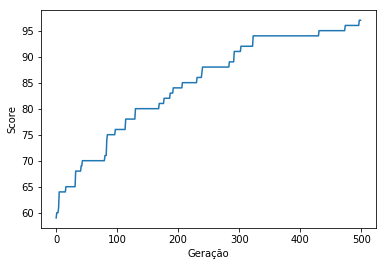

In [20]:
plt.plot(geras, scos)
plt.xlabel("Geração")
plt.ylabel("Score")
plt.show()